# SVC on Congressional Voting Records Data Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
hv=pd.read_csv('house-votes-84.csv')
hv.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
#Replacing "?" with NaN
hv=hv.replace('?',np.nan)
hv.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [6]:
hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Class Name                               435 non-null    object
 1    handicapped-infants                     423 non-null    object
 2    water-project-cost-sharing              387 non-null    object
 3    adoption-of-the-budget-resolution       424 non-null    object
 4    physician-fee-freeze                    424 non-null    object
 5    el-salvador-aid                         420 non-null    object
 6    religious-groups-in-schools             424 non-null    object
 7    anti-satellite-test-ban                 421 non-null    object
 8    aid-to-nicaraguan-contras               420 non-null    object
 9    mx-missile                              413 non-null    object
 10   immigration                             428 non-null    objec

In [7]:
#Filling the NaN values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
hv=imp.fit_transform(hv)
df_new=pd.DataFrame(hv,columns=pd.read_csv('house-votes-84.csv').columns)
df_new.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [8]:
X=df_new.drop('Class Name',axis=1)
y=df_new['Class Name']

In [9]:
#Converting categorical features to numeric using dummy endocing
X=pd.get_dummies(X,columns=X.columns,drop_first=True)

In [10]:
X.head()

,handicapped-infants_y,water-project-cost-sharing_y,adoption-of-the-budget-resolution_y,physician-fee-freeze_y,el-salvador-aid_y,religious-groups-in-schools_y,anti-satellite-test-ban_y,aid-to-nicaraguan-contras_y,mx-missile_y,immigration_y,synfuels-corporation-cutback_y,education-spending_y,superfund-right-to-sue_y,crime_y,duty-free-exports_y,export-administration-act-south-africa_y
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [11]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=21)

In [12]:
#Applying model
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9724770642201835

In [26]:
y_pred=svc.predict(X_test)

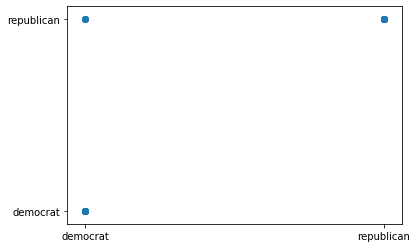

In [27]:
plt.scatter(y_test,y_pred)
plt.show()